In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(os.path.join(os.getcwd(),"Mall_Customers.csv"))
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.drop(['CustomerID'],axis=1,inplace=True)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
#create features for plot

#for age
def age_change(x):
    if x>=18 and x<30:
        return("18-30")
    elif x>=30 and x<45:
        return("30-45")
    elif x>=45 and x<55:
        return("45-55")
    else:
        return('above-55')
x_age=df['Age'].apply(age_change)


#for Annual income 

def annal_change(x):
    if x>=15 and x<40:
        return("18-40")
    elif x>=40 and x<60:
        return("40-60")
    elif x>=60 and x<90:
        return("60-90")
    else:
        return('above_90')
x_income=df['Annual Income (k$)'].apply(annal_change)

#for Annual income 

def score(x):
    if x>=1 and x<34:
        return("1-34")
    elif x>=34 and x<50:
        return("30-45")
    elif x>=50 and x<75:
        return("50-75")
    else:
        return('above_75')
x_score=df['Age'].apply(score)

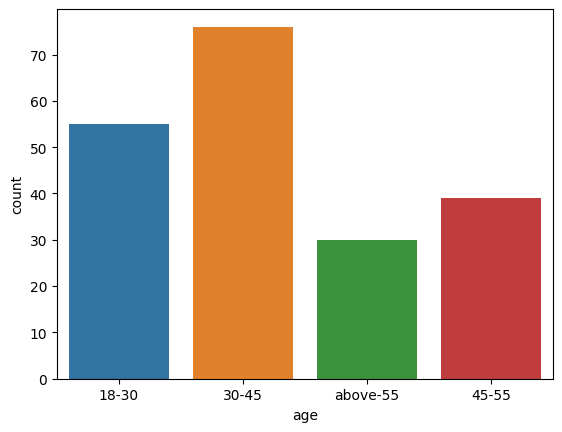

In [7]:
sns.countplot(x=x_age)
plt.xlabel("age")
plt.show()

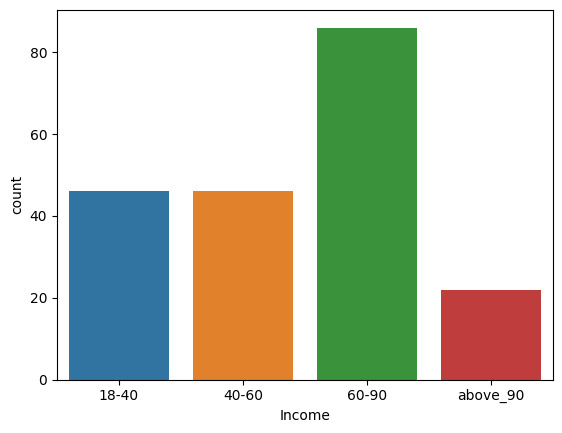

In [8]:
sns.countplot(x=x_income)
plt.xlabel("Income")
plt.show()

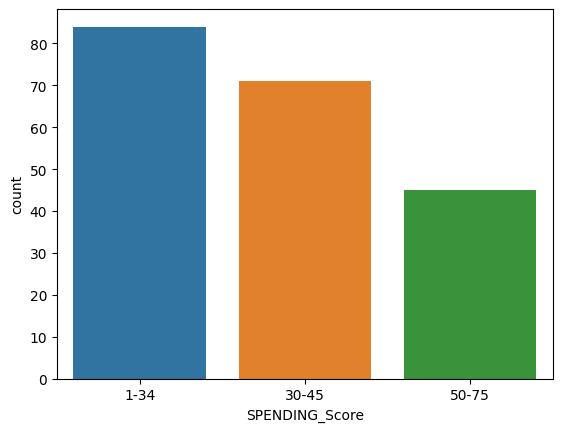

In [9]:
sns.countplot(x=x_score)
plt.xlabel("SPENDING_Score")
plt.show()

In [10]:
numeric_data = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_data = df.select_dtypes(exclude=[np.number]).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('ordinal', OrdinalEncoder())  # Encode categorical features
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_data),
        ('cat', categorical_transformer, categorical_data)
    ]
)

X_processed = preprocessor.fit_transform(df)


In [11]:
int64_feature_names = [f"{col}_scaled" for col in numeric_data]
categorical_feature_names = [f"{col}_encoded" for col in categorical_data]

# Combine feature names
all_feature_names = int64_feature_names + categorical_feature_names

# Create DataFrame with processed features
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)
X_processed_df.head()

,Age_scaled,Annual Income (k$)_scaled,Spending Score (1-100)_scaled,Genre_encoded
0,-1.424569,-1.738999,-0.434801,1.0
1,-1.281035,-1.738999,1.195704,1.0
2,-1.352802,-1.700830,-1.715913,0.0
3,-1.137502,-1.700830,1.040418,0.0
4,-0.563369,-1.662660,-0.395980,0.0


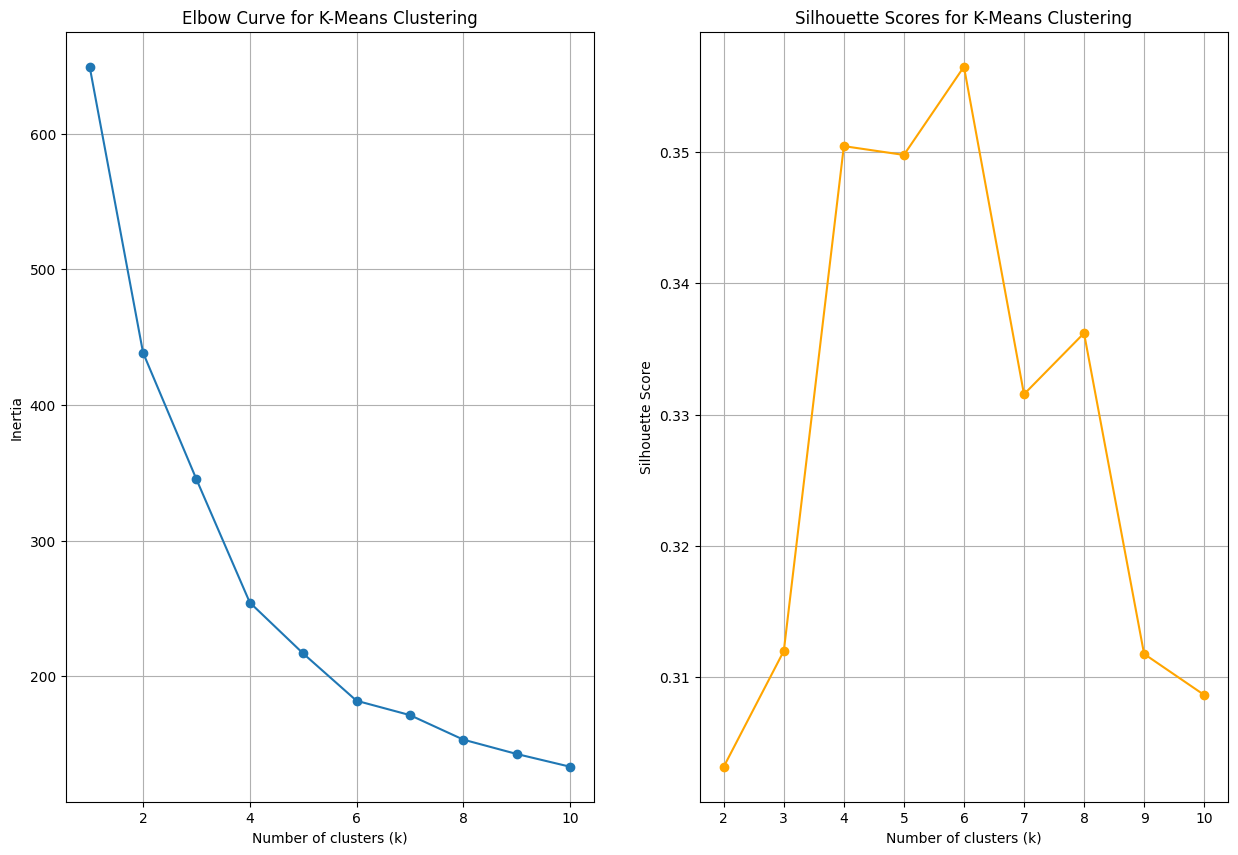

In [12]:
#apply k_means 
inertia=[]
silhouette_scores = []

for k in range(1,11,1):
    #for elbow
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)
    # for silhouette_scores
    if k > 1:
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(X_processed, cluster_labels,random_state=42)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None) 
# Plot the elbow curve
plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-Means Clustering')
plt.grid(True)

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(1,11), silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means Clustering')
plt.grid(True)
plt.show()

In [13]:
# best k=6 
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_processed)
df['label']=kmeans.labels_
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,4
1,Male,21,15,81,4
2,Female,20,16,6,2
3,Female,23,16,77,4
4,Female,31,17,40,2


In [14]:
def new_instance(x_new):
    x=pd.DataFrame([x_new])
    x=preprocessor.transform(x)
    x=kmeans.predict(x)
    return f"The cluster is: {x[0]}"

In [15]:
new_instance_data = {
    'Genre': 'Male',
    'Age': 30,
    'Annual Income (k$)': 60,
    'Spending Score (1-100)': 70
}

# Predict cluster for the new instance
predicted_cluster = new_instance(new_instance_data)
print(f"Predicted cluster for new instance: {predicted_cluster}")

Predicted cluster for new instance: The cluster is: 5
